## 决策树(Decision_Tree)
### 决策树算法理解
#### 1.介绍
决策树是什么？决策树(decision tree)是一种基本的分类与回归方法。举个通俗易懂的例子，如下图所示的流程图就是一个决策树，长方形代表判断模块(decision block)，椭圆形成代表终止模块(terminating block)，表示已经得出结论，可以终止运行。从判断模块引出的左右箭头称作为分支(branch)，它可以达到另一个判断模块或者终止模块。我们还可以这样理解，分类决策树模型是一种描述对实例进行分类的树形结构。决策树由结点(node)和有向边(directed edge)组成。结点有两种类型：内部结点(internal node)和叶结点(leaf node)。内部结点表示一个特征或属性，叶结点表示一个类。蒙圈没？？如下图所示的决策树，长方形和椭圆形都是结点。长方形的结点属于内部结点，椭圆形的结点属于叶结点，从结点引出的左右箭头就是有向边。而最上面的结点就是决策树的根结点(root node)。这样，结点说法就与模块说法对应上了，理解就好。
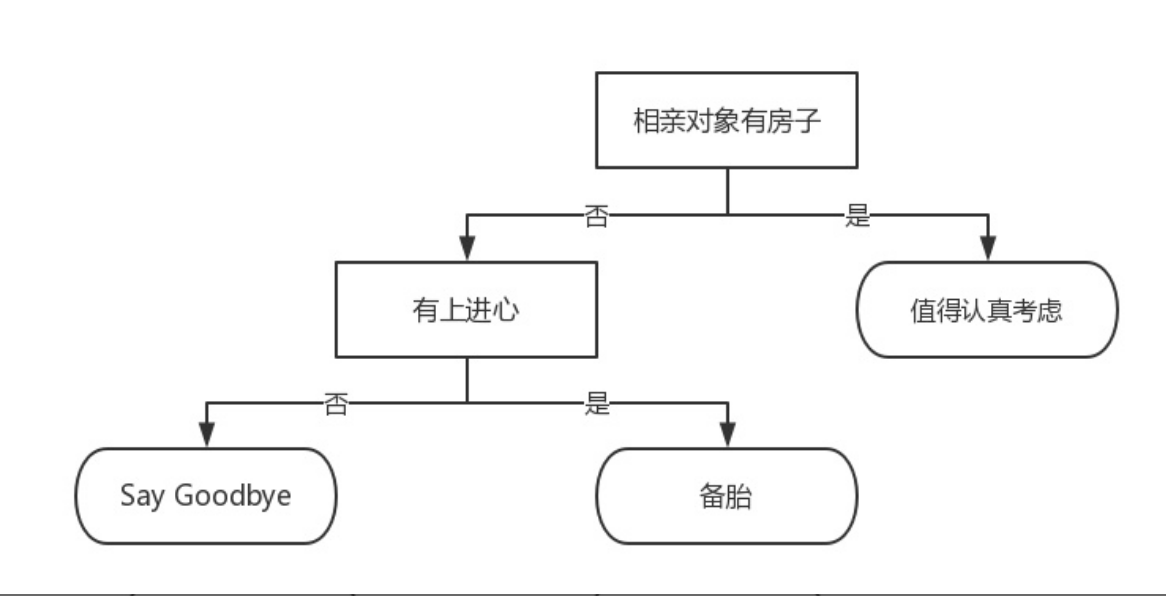
我们可以把决策树看成一个if-then规则的集合，将决策树转换成if-then规则的过程是这样的：由决策树的根结点(root node)到叶结点(leaf node)的每一条路径构建一条规则；路径上内部结点的特征对应着规则的条件，而叶结点的类对应着规则的结论。决策树的路径或其对应的if-then规则集合具有一个重要的性质：互斥并且完备。这就是说，每一个实例都被一条路径或一条规则所覆盖，而且只被一条路径或一条规则所覆盖。这里所覆盖是指实例的特征与路径上的特征一致或实例满足规则的条件。
使用决策树做预测需要以下过程：
- 1.收集数据：各种方法；
- 2.准备数据：对数据进行整理，将这些所有收集到的信息按照一定规则整理出来并排版，方便后续处理；
- 3.分析数据：构造完决策树之后，可以检查决策树图形是否符合预期；
- 4.训练算法：决策树学习过程，构造一个决策树的数据结构；
- 5.使用算法：此步骤适用与任何的监督学习算法，使用决策树可以更好的理解数据的内在含义。
#### 2.决策树构建之前的准备
使用决策树做预测的每一步骤都很重要，数据收集不到位，将会导致没有足够的特征让我们构建错误率低的决策树。数据特征充足，但是不知道用哪些特征好，将会导致无法构建出分类效果好的决策树模型。从算法方面看，决策树的构建是我们的核心内容。
决策树的构建过程包括三个步骤：
- 1.特征选择
- 2.决策树生成
- 3.决策树的修建
**1.特征选择**
特征选择在于选取对训练数据具有分类能力的特征。这样可以提高决策树学习的效率，如果利用一个特征进行分类的结果与随机分类的结果没有很大差别，则称这个特征是没有分类能力的。经验上扔掉这样的特征对决策树学习的精度影响不大。通常特征选择的标准是信息增益(information gain)或信息增益比，为了简单，本文章使用信息增益作为选择特征的标准。那么，什么是信息增益？在讲解信息增益之前，让我们看一组实例，贷款申请样本数据表：

| ID     | 年龄  | 工作 |   房子   |  信贷  |  是否放款 |
|--------|------|-----|-------|-------|----------|
| 1      | 青年  | 否   |   否    |  一般  |   否     |
| 2      | 青年  | 否    |  否    |  好    |   否     |
| 3      | 青年  | 是    |  否    |  好    |   是     |
| 4      | 青年  | 是    |  是    |  一般  |   是     |
| 5      | 青年  | 否    |  否    |  一般    |   否     |
| 6      | 中年  | 否    |  否    |  一般    |   否     |
| 7      | 中年  | 否    |  否    |  好    |   否     |
| 8      | 中年  | 是    |  是    |  好    |   是     |
| 9      | 中年  | 否    |  是    |  非常好    |   是     |
| 10      | 中年  | 否    |  是    |  非常好    |   是     |
| 11      | 老年  | 否    |  是    |  非常好    |   是     |
| 12      | 老年  | 否    |  是    |  好    |   是     |
| 13      | 老年  | 是    |  否    |  好    |   是     |
| 14      | 老年  | 是    |  否    |  非常好    |   是     |
| 15      | 老年  | 否    |  否    |  一般    |   否     |

希望通过所给的训练数据学习一个贷款申请的决策树，用以对未来的贷款申请进行分类，即当新的客户提出贷款申请时，根据申请人的特征利用决策树决定是否批准贷款申请。

特征选择就是决定用哪个特征来划分特征空间。比如，我们通过上述数据表得到两个可能的决策树，分别由两个不同特征的根结点构成。
